# K-Means Clustering – Student Notebook

## 📘 Objective
In this notebook, you will:
- Understand the theory behind K-means clustering
- Implement K-means step by step
- Apply it to real data
- Evaluate your clustering results
- Compare your implementation with scikit-learn’s

## 1️⃣ Introduction to Clustering
### 1.1 What is Clustering?
Clustering is an **unsupervised learning** technique used to group similar data points together. It’s used in:
- Customer segmentation
- Document classification
- Image compression
- Anomaly detection

### 1.2 What is K-means?
K-means is a partitioning algorithm that:
- Divides data into **K clusters**
- Minimizes **intra-cluster variance** (inertia)
- Assumes clusters are spherical and similarly sized

## 2️⃣ K-Means Algorithm – Intuition
### Step-by-step procedure:
1. Randomly initialize K centroids
2. Assign each data point to the nearest centroid
3. Recalculate centroids as the mean of assigned points
4. Repeat steps 2–3 until convergence

Convergence criteria:
- No change in cluster assignments
- Or centroids stop moving

## 3️⃣ Hands-On: Simulated Dataset
### 3.1 Dataset
We’ll use the [custommer segmentation](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data) dataset from kaggle.

In [84]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [85]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [86]:
df.shape

(200, 5)

### 4.1 Initialize Centroids

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [88]:
def initialize_centroids(X, k):
    """
    Randomly select k points from X as initial centroids.
    """
    np_samples = X.shape[0]
    random_k = np.random.choice(np_samples, size = k , replace = False)
    centroid = X[random_k]
    return centroid

### 4.2 Assign Clusters

In [89]:
def assign_clusters(X, centroids):
    """
    Assign each data point to the nearest centroid.
    Returns a vector of cluster labels.
    """

    distances = [np.linalg.norm(X-point,axis=1) for point in centroids]
    closest_point = np.argmin(distances,axis=0)
    return closest_point


### 4.3 Update Centroids

In [90]:
def compute_centroids(X, labels, k):
    """
    Compute new centroids as the mean of assigned points for each cluster.
    """
    new_centroids = [np.mean(X[labels == c],axis=0) for c in range(k)]
    centroid = np.array(new_centroids)
    return centroid

### 4.4 Full K-Means Algorithm

In [91]:
def k_means(X, k, max_iters=100):
    """
    Run the full K-means algorithm.
    Returns final centroids and cluster assignments.
    """

    centroids =initialize_centroids(X,k)
    for _ in range(max_iters):

      labels = assign_clusters(X, centroids)
      new_centroids = compute_centroids(X,labels,k)
      centroids = new_centroids

    return centroids, assign_clusters(X,centroids)

### 5.1 Inertia

In [92]:
def compute_inertia(X, centroids, labels):
    """
    Compute total intra-cluster variance (inertia).
    """
    new_centroids = [np.mean(X[labels == c],axis=0) for c in range(k)]
    inertia = np.sum(np.square(np.linalg.norm(X-centroids[labels],axis=1)))
    return inertia

In [93]:
df = df.drop('CustomerID', axis=1)

#encodage of genre

In [94]:
df['Gender'] = (df['Gender']=='Male').astype(int)

## 5️⃣ Evaluation
### 5.2 Silhouette Score
How similar a point is to its cluster compared to other clusters (optional using `sklearn`).

In [95]:
from sklearn.metrics import silhouette_score
np.random.seed(42)
X = df.to_numpy()
k = 2

my_centroids, my_labels = k_means(X, k, max_iters=100)

print("Silhouette_score :",silhouette_score(X,my_labels))


Silhouette_score : 0.2546107044763696


## 6️⃣ Comparison with scikit-learn
Use `sklearn.cluster.KMeans` to compare your results:
- Cluster centers
- Inertia
- Assignments

In [96]:
from sklearn.cluster import KMeans
np.random.seed(42)
X = df.to_numpy()
k = 2

my_centroids, my_labels = k_means(X, k, max_iters=100)
my_inertia = compute_inertia(X, my_centroids, my_labels)

sk_kmean = KMeans(k,max_iter=100,init='random')
sk_kmean.fit(X)
sk_labels = sk_kmean.predict(X)
sk_centroids = sk_kmean.cluster_centers_
sk_inertia = sk_kmean.inertia_

print ("The Centroids of my function is : ",my_centroids ,"\n VS  The Centroids of the sklearn :\n ",sk_centroids)
print ("The Labels of my function is : ",my_labels, " \n VS  The Labels of the sklearn :\n ",sk_labels)
print ("The Inertia of my function is : ",my_inertia, "\n  VS  The Inertia of the sklearn :\n ",sk_inertia)

The Centroids of my function is :  [[ 0.46846847 37.43243243 79.38738739 50.21621622]
 [ 0.40449438 40.61797753 37.07865169 50.17977528]] 
 VS  The Centroids of the sklearn :
  [[ 0.44705882 28.95294118 62.17647059 73.62352941]
 [ 0.43478261 46.16521739 59.36521739 32.88695652]]
The Labels of my function is :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]  
 VS  The Labels of the sklearn :
  [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 1 

## 7️⃣ Experiments
### 7.1 Multiple Initializations
Try running K-means multiple times to observe different results due to random initialization.

### 7.2 Elbow Method
Plot inertia vs. K to find the optimal number of clusters.

### Multiple Initializations

In [97]:
import time
X = df.to_numpy()
k = 2

In [98]:
np.random.seed(int(time.time()))

my_centroids, my_labels = k_means(X, k, max_iters=100)
my_inertia = compute_inertia(X, my_centroids, my_labels)

print ("The Centroids of my function is : ",my_centroids )
print ("The Labels of my function is : ",my_labels)
print ("The Inertia of my function is : ",my_inertia)


The Centroids of my function is :  [[ 0.44705882 28.95294118 62.17647059 73.62352941]
 [ 0.43478261 46.16521739 59.36521739 32.88695652]]
The Labels of my function is :  [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
The Inertia of my function is :  212889.44245524297


In [99]:
np.random.seed(int(time.time()))

my_centroids, my_labels = k_means(X, k, max_iters=100)
my_inertia = compute_inertia(X, my_centroids, my_labels)

print ("The Centroids of my function is : ",my_centroids )
print ("The Labels of my function is : ",my_labels)
print ("The Inertia of my function is : ",my_inertia)


The Centroids of my function is :  [[ 0.44705882 28.95294118 62.17647059 73.62352941]
 [ 0.43478261 46.16521739 59.36521739 32.88695652]]
The Labels of my function is :  [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
The Inertia of my function is :  212889.44245524297


In [100]:
np.random.seed(int(time.time()))

my_centroids, my_labels = k_means(X, k, max_iters=100)
my_inertia = compute_inertia(X, my_centroids, my_labels)

print ("The Centroids of my function is : ",my_centroids )
print ("The Labels of my function is : ",my_labels)
print ("The Inertia of my function is : ",my_inertia)


The Centroids of my function is :  [[ 0.44705882 28.95294118 62.17647059 73.62352941]
 [ 0.43478261 46.16521739 59.36521739 32.88695652]]
The Labels of my function is :  [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
The Inertia of my function is :  212889.44245524297


### Elbow Method

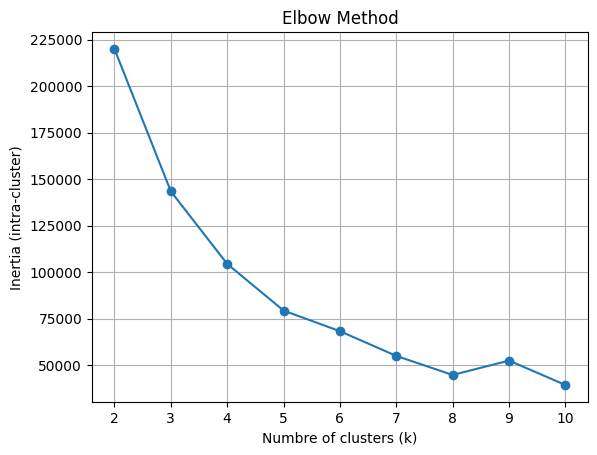

In [101]:
np.random.seed(42)

inertias = []
max_k = 10

for i in range(2,max_k +1):
  my_centroids, my_labels = k_means(X, i, max_iters=100)
  my_inertia = compute_inertia(X, my_centroids, my_labels)
  inertias.append(my_inertia)

plt.plot(range(2, max_k + 1), inertias, marker='o')
plt.xticks(range(2, max_k + 1))
plt.xlabel("Numbre of clusters (k)")
plt.ylabel("Inertia (intra-cluster)")
plt.title("Elbow Method")
plt.grid(True)
plt.show()




## 8️⃣ Bonus Challenges
- Implement a **convergence check** based on centroid movement.
- Apply K-means to **image compression** (reshape image pixels).
- Try **PCA before clustering** to reduce dimensionality.
- Implement **K-means++ initialization**.

##  Convergence check

In [102]:
def k_means(X, k, max_iters=100,eps=0.001):
    """
    Run the full K-means algorithm.
    Returns final centroids and cluster assignments.
    """

    centroids =initialize_centroids(X,k)
    for _ in range(max_iters):

      labels = assign_clusters(X, centroids)
      new_centroids = compute_centroids(X,labels,k)

      if np.all(np.linalg.norm((centroids - new_centroids),axis=1)<eps):
        break

      centroids = new_centroids

    return centroids, assign_clusters(X,centroids)

## Apply K-means to image compression (reshape image pixels).

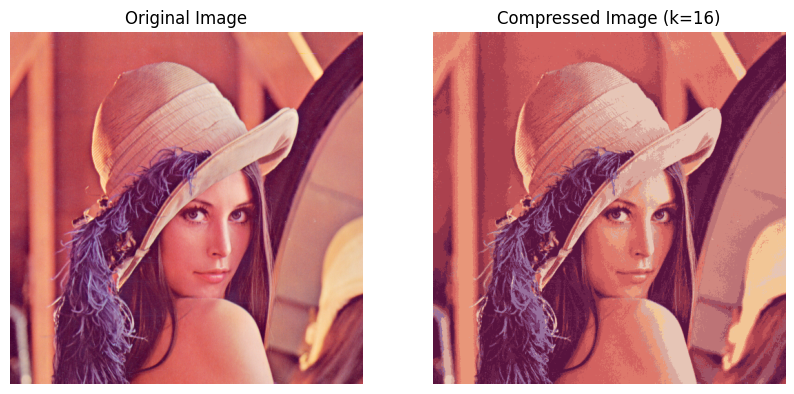

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def compress_image(image_path, k=16, max_iters=100):

    image = plt.imread("lena.png")

    if image.dtype == np.uint8:
        image = image / 255.0


    h, w, d = image.shape
    X = image.reshape(-1, d)

    # 3. Apply the K-means
    kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=42)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_


    X_compressed = centroids[labels]
    image_compressed = X_compressed.reshape(h, w, d)

    return image_compressed, centroids


k = 16  # Number of final color
image_compressed, centroids = compress_image("lena.png", k=k)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(plt.imread("lena.png"))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Compressed Image (k={k})")
plt.imshow(image_compressed)
plt.axis('off')

plt.show()

## PCA

In [104]:
from sklearn.decomposition import PCA

def k_means(X, k, max_iters=100):
    """
    Run the full K-means algorithm on the PCA-reduced data (2D).
    Returns final centroids and cluster assignments.
    """
    # PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)


    centroids = initialize_centroids(X_reduced, k)
    for _ in range(max_iters):
        labels = assign_clusters(X_reduced, centroids)
        new_centroids = compute_centroids(X_reduced, labels, k)
        centroids = new_centroids


    return centroids, assign_clusters(X_reduced, centroids)


##  K-means++ initialization.

In [103]:
def initialize_centroids_Kmean(X,k):
      centroids = []

      i = np.random.randint(X.shape[0])
      centroids.append(X[i])

      for j in range(1,k):

          dist = np.array([min([np.sum((c-x)**2) for c in centroids]) for x in X])
          probs = dist / dist.sum()
          cum_probs = np.cumsum(probs)
          r = np.random.rand()
          for k, p in enumerate(cum_probs):
              if r < p:
                  centroids.append(X[k])
                  break

      centroid = np.array(centroids)
      return centroid


## 9️⃣ Conceptual Quiz (Optional)
1. What is the objective function optimized in K-means?
2. Why can initialization affect the result?
3. How can we choose K without labels?
4. When does K-means fail?

_End of Notebook_